<a href="https://colab.research.google.com/github/SandaruwiniGalappaththi/SuperStore/blob/main/DataPreprocessing(FixedBounds).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install pyspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
# Import SparkSession
from pyspark.sql import SparkSession
# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Check Spark Session Information
spark

In [86]:
import pandas as pd
import numpy as np

In [106]:
url = "https://raw.githubusercontent.com/SandaruwiniGalappaththi/SuperStore/main/superstore.csv"
superstore_df = pd.read_csv(url ,encoding='windows-1252')
superstore_df

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,NaN,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [107]:
from pyspark.sql.types import *

sales_schema = StructType([
    StructField("RowID", IntegerType(), False),
    StructField("OrderID", StringType(), False),
    StructField("OrderDate", StringType(), False, metadata={"desc": "Date of order placed"}),
    StructField("ShipDate", StringType(), False, metadata={"desc": "Date of order shipped"}),
    StructField("ShipMode", StringType(), True, metadata={"desc": "Mode of shipment"}),
    StructField("CustomerID", StringType(), False),
    StructField("CustomerName", StringType(), True),
    StructField("Segment", StringType(), True, metadata={"desc": "Type of the customer"}),
    StructField("Country", StringType(), True),
    StructField("City", StringType(), False),
    StructField("State", StringType(), True),
    StructField("PostalCode", StringType(), True),
    StructField("Region", StringType(), True),
    StructField("ProductID", StringType(), False),
    StructField("Category", StringType(), True),
    StructField("SubCategory", StringType(), True),
    StructField("ProductName", StringType(), True),
    StructField("Sales", FloatType(), False),
    StructField("Quantity", IntegerType(), False),
    StructField("Discount", FloatType(), False),
    StructField("Profit", FloatType(), False),
])

In [108]:
superstore_sdf = spark.createDataFrame(superstore_df, sales_schema)
superstore_sdf.show()

+-----+--------------+----------+----------+--------------+----------+------------------+-----------+-------------+---------------+--------------+----------+-------+---------------+---------------+-----------+--------------------+--------+--------+--------+--------+
|RowID|       OrderID| OrderDate|  ShipDate|      ShipMode|CustomerID|      CustomerName|    Segment|      Country|           City|         State|PostalCode| Region|      ProductID|       Category|SubCategory|         ProductName|   Sales|Quantity|Discount|  Profit|
+-----+--------------+----------+----------+--------------+----------+------------------+-----------+-------------+---------------+--------------+----------+-------+---------------+---------------+-----------+--------------------+--------+--------+--------+--------+
|    1|CA-2016-152156| 11/8/2016|11/11/2016|  Second Class|  CG-12520|       Claire Gute|   Consumer|United States|      Henderson|      Kentucky|     42420|  South|FUR-BO-10001798|            NaN|  

##Sales are bounded for positive values

##Therefore checking whether having negative values for sales

In [109]:
(superstore_df.Sales < 0).any()

False

##Quantity is bounded for positive values

##Therefore checking whether having negative values for quantity

In [110]:
(superstore_df.Quantity < 0).any()

False

##Profit is usually bounded by positive values

##Therefore checking whether having negative values for profit



In [120]:
(superstore_df.Profit < 0).any()

True

##We can consider negative profits to represent the loss

In [111]:
superstore_df.query('Profit < 0')

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
14,15,US-2015-118983,11/22/2015,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,11/22/2015,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
23,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
27,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,9921,CA-2016-149272,3/15/2016,3/19/2016,Standard Class,MY-18295,Muhammed Yedwab,Corporate,United States,Bryan,...,77803,Central,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",22.3860,7,0.80,-35.8176
9921,9922,CA-2014-111360,11/24/2014,11/30/2014,Standard Class,AT-10435,Alyssa Tate,Home Office,United States,Akron,...,44312,East,OFF-BI-10003350,Office Supplies,Binders,Acco Expandable Hanging Binders,5.7420,3,0.70,-4.5936
9931,9932,CA-2015-104948,11/13/2015,11/17/2015,Standard Class,KH-16510,Keith Herrera,Consumer,United States,San Bernardino,...,92404,West,FUR-BO-10004357,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320,4,0.15,-40.1960
9937,9938,CA-2016-164889,6/3/2016,6/6/2016,Second Class,CP-12340,Christine Phan,Corporate,United States,Los Angeles,...,90049,West,FUR-TA-10001676,Furniture,Tables,Hon 61000 Series Interactive Training Tables,71.0880,2,0.20,-1.7772


##Discount is bounded for positive values

##Therefore checking whether having negative values for Discount

In [112]:
(superstore_df.Discount < 0).any()

True

In [113]:
len(superstore_df.query('Discount < 0'))

17

##There are 17 negative values for discount.

##It is probably a mistake.

In [114]:
superstore_df.query('Discount < 0')

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
1173,1174,US-2015-104430,10/22/2015,10/26/2015,Standard Class,LT-17110,Liz Thompson,Consumer,United States,Bloomington,...,61701,Central,OFF-BI-10000301,Office Supplies,Binders,GBC Instant Report Kit,5.176,4,-0.8,-7.7640
1271,1272,US-2016-103646,4/21/2016,4/26/2016,Standard Class,SP-20545,Sibella Parks,Corporate,United States,Chicago,...,60623,Central,OFF-AP-10004487,Office Supplies,Appliances,Kensington 4 Outlet MasterPiece Compact Power ...,48.792,3,-0.8,-126.8592
1284,1285,US-2015-149692,12/6/2015,12/12/2015,Standard Class,KW-16435,Katrina Willman,Consumer,United States,Austin,...,78745,Central,OFF-BI-10002813,Office Supplies,Binders,Avery Reinforcements for Hole-Punch Pages,2.772,7,-0.8,-4.8510
1332,1333,CA-2014-122567,2/16/2014,2/21/2014,Standard Class,MN-17935,Michael Nguyen,Consumer,United States,Dallas,...,75220,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,1.080,3,-0.8,-1.7280
1513,1514,CA-2017-112809,8/18/2017,8/22/2017,Standard Class,RA-19915,Russell Applegate,Consumer,United States,Dallas,...,75220,Central,OFF-BI-10001098,Office Supplies,Binders,Acco D-Ring Binder w/DublLock,21.380,5,-0.8,-33.1390
1770,1771,CA-2017-146024,3/2/2017,3/8/2017,Standard Class,SC-20770,Stewart Carmichael,Corporate,United States,Dallas,...,75081,Central,OFF-BI-10003291,Office Supplies,Binders,Wilson Jones Leather-Like Binders with DublLoc...,12.222,7,-0.8,-20.1663
1818,1819,US-2014-130379,5/25/2014,5/29/2014,Standard Class,JL-15235,Janet Lee,Consumer,United States,Chicago,...,60623,Central,OFF-AP-10001394,Office Supplies,Appliances,Harmony Air Purifier,75.600,2,-0.8,-166.3200
1820,1821,CA-2016-168956,2/16/2016,2/20/2016,Standard Class,EA-14035,Erin Ashbrook,Corporate,United States,Chicago,...,60623,Central,OFF-AP-10004233,Office Supplies,Appliances,Honeywell Enviracaire Portable Air Cleaner for...,92.064,6,-0.8,-225.5568
1857,1858,US-2017-158218,5/12/2017,5/15/2017,Second Class,AC-10420,Alyssa Crouse,Corporate,United States,Houston,...,77041,Central,OFF-BI-10002133,Office Supplies,Binders,"Wilson Jones Elliptical Ring 3 1/2"" Capacity B...",34.240,4,-0.8,-53.0720
1943,1944,CA-2017-144064,8/29/2017,9/1/2017,First Class,CP-12085,Cathy Prescott,Corporate,United States,Quincy,...,62301,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.240,9,-0.8,-5.1840


In [115]:
neg_Discount = superstore_df[superstore_df.Discount < 0]
neg_Discount

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
1173,1174,US-2015-104430,10/22/2015,10/26/2015,Standard Class,LT-17110,Liz Thompson,Consumer,United States,Bloomington,...,61701,Central,OFF-BI-10000301,Office Supplies,Binders,GBC Instant Report Kit,5.176,4,-0.8,-7.7640
1271,1272,US-2016-103646,4/21/2016,4/26/2016,Standard Class,SP-20545,Sibella Parks,Corporate,United States,Chicago,...,60623,Central,OFF-AP-10004487,Office Supplies,Appliances,Kensington 4 Outlet MasterPiece Compact Power ...,48.792,3,-0.8,-126.8592
1284,1285,US-2015-149692,12/6/2015,12/12/2015,Standard Class,KW-16435,Katrina Willman,Consumer,United States,Austin,...,78745,Central,OFF-BI-10002813,Office Supplies,Binders,Avery Reinforcements for Hole-Punch Pages,2.772,7,-0.8,-4.8510
1332,1333,CA-2014-122567,2/16/2014,2/21/2014,Standard Class,MN-17935,Michael Nguyen,Consumer,United States,Dallas,...,75220,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,1.080,3,-0.8,-1.7280
1513,1514,CA-2017-112809,8/18/2017,8/22/2017,Standard Class,RA-19915,Russell Applegate,Consumer,United States,Dallas,...,75220,Central,OFF-BI-10001098,Office Supplies,Binders,Acco D-Ring Binder w/DublLock,21.380,5,-0.8,-33.1390
1770,1771,CA-2017-146024,3/2/2017,3/8/2017,Standard Class,SC-20770,Stewart Carmichael,Corporate,United States,Dallas,...,75081,Central,OFF-BI-10003291,Office Supplies,Binders,Wilson Jones Leather-Like Binders with DublLoc...,12.222,7,-0.8,-20.1663
1818,1819,US-2014-130379,5/25/2014,5/29/2014,Standard Class,JL-15235,Janet Lee,Consumer,United States,Chicago,...,60623,Central,OFF-AP-10001394,Office Supplies,Appliances,Harmony Air Purifier,75.600,2,-0.8,-166.3200
1820,1821,CA-2016-168956,2/16/2016,2/20/2016,Standard Class,EA-14035,Erin Ashbrook,Corporate,United States,Chicago,...,60623,Central,OFF-AP-10004233,Office Supplies,Appliances,Honeywell Enviracaire Portable Air Cleaner for...,92.064,6,-0.8,-225.5568
1857,1858,US-2017-158218,5/12/2017,5/15/2017,Second Class,AC-10420,Alyssa Crouse,Corporate,United States,Houston,...,77041,Central,OFF-BI-10002133,Office Supplies,Binders,"Wilson Jones Elliptical Ring 3 1/2"" Capacity B...",34.240,4,-0.8,-53.0720
1943,1944,CA-2017-144064,8/29/2017,9/1/2017,First Class,CP-12085,Cathy Prescott,Corporate,United States,Quincy,...,62301,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.240,9,-0.8,-5.1840


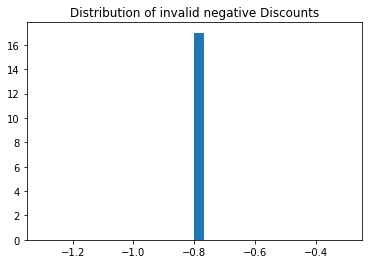

In [116]:
import matplotlib.pyplot as plt
plt.hist(neg_Discount.Discount, bins=30)
plt.title("Distribution of invalid negative Discounts");

In [117]:
neg_Discount.Discount.value_counts()

-0.8    17
Name: Discount, dtype: int64

In [118]:
+len(superstore_df.query('Discount == 0.8 | Discount == -0.8'))

300

##After considering negative discount values we can conclude that,

###1. there is only one negative discount value which is -0.8.

###2. Total count of orders with a discount of +0.8 and -0.8 is 300.

###3. Therefore we can say there is a mistake with the minus sign in the database.

###4. We can replace -0.8 as +0.8 for further data mining approaches.

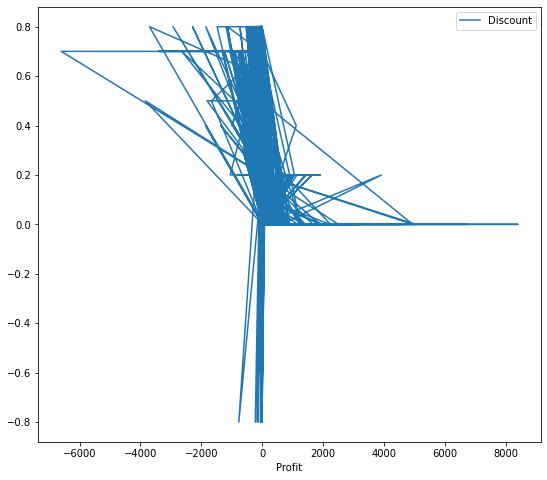

In [119]:
import matplotlib.pyplot as mp
superstore_df.plot(x="Profit", y="Discount", figsize=(9, 8))
mp.show()